In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from pathlib import Path
import tensorflow as tf

IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE

def parse_pair(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

def parse_unlabeled(img_path):
    return parse_pair(img_path)

def build_dataset(img_dir, is_masked=True):
    img_dir = Path(img_dir)

    print("Directory contents:")
    for path in img_dir.glob("*"):
        print(path)

    img_paths = sorted([str(p) for p in img_dir.rglob("*.jpg")])
    print("Found image paths:", img_paths[:5])  # print first 5

    if not img_paths:
        print("⚠️ No .jpg images found. Check your path!")

    path_ds = tf.data.Dataset.from_tensor_slices(tf.constant(img_paths, dtype=tf.string))

    if is_masked:
        ds = path_ds.map(parse_pair, num_parallel_calls=AUTOTUNE)
    else:
        ds = path_ds.map(parse_unlabeled, num_parallel_calls=AUTOTUNE)

    return ds


In [5]:
ds_train = build_dataset("/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train", is_masked=True)
print("Dataset element count:", ds_train.cardinality().numpy())


Directory contents:
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Unlabeled
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled
Found image paths: ['/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image/10165.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image/10166.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image/6279.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image/6614.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image/6615.jpg']
Dataset element count: 1445


Image shape: (256, 256, 3)
Pixel values (first few): [0.06133578 0.08878677 0.05741422 0.04790901 0.08712469 0.04398744
 0.05533471 0.08670726 0.04357    0.09851027]


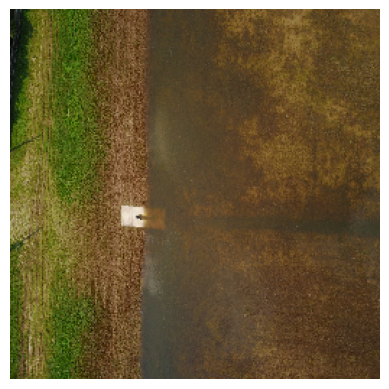

Image shape: (256, 256, 3)
Pixel values (first few): [0.50271904 0.5419347  0.5066406  0.43976715 0.48682597 0.4476103
 0.42898667 0.46428078 0.44467294 0.356093  ]


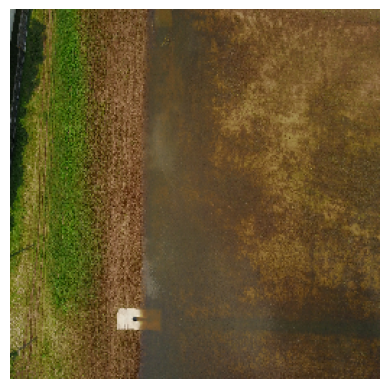

Image shape: (256, 256, 3)
Pixel values (first few): [0.39791667 0.37941176 0.13570006 0.61519605 0.5966912  0.36121324
 0.4870749  0.43609452 0.26103708 0.389748  ]


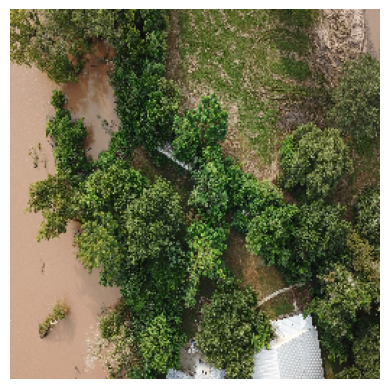

Image shape: (256, 256, 3)
Pixel values (first few): [0.7009191  0.5871936  0.4401348  0.69693625 0.59889704 0.48125
 0.69215685 0.5836397  0.48958334 0.6901961 ]


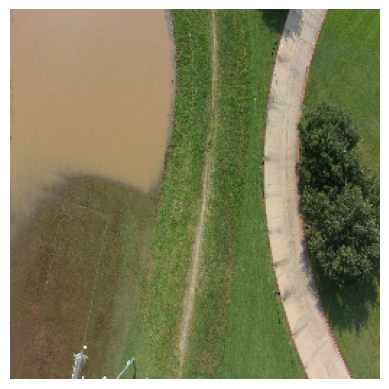

Image shape: (256, 256, 3)
Pixel values (first few): [0.66887254 0.5747549  0.46887255 0.6827206  0.5846814  0.47683823
 0.67248774 0.5783701  0.47248775 0.66023284]


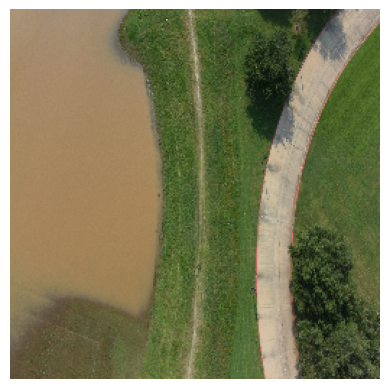

In [6]:
import matplotlib.pyplot as plt

for img in ds_train.take(5):
    print("Image shape:", img.shape)
    print("Pixel values (first few):", img.numpy().flatten()[:10])
    plt.imshow(img.numpy())
    plt.axis('off')
    plt.show()


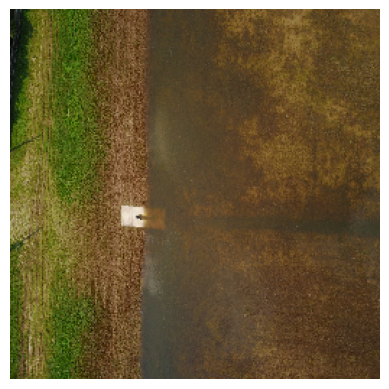

In [7]:
for img in ds_train.take(1):
    plt.imshow(img.numpy())
    plt.axis('off')
    plt.show()


In [8]:
!pip install tensorFlow

In [12]:
import os

file_path = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge'

if os.path.exists(file_path):
    print("File or directory exists.")
else:
    print("File or directory does NOT exist.")


File or directory exists.


In [13]:
dir_path = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge'

if os.path.exists(dir_path) and os.path.isdir(dir_path):
    files = os.listdir(dir_path)
    print("Files and folders in directory:", files)
else:
    print("Directory does not exist.")


Files and folders in directory: ['FloodNet Challenge - Track 1', 'FloodNet Challenge - Track 2']


In [14]:
import os

folder_path = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image'

if os.path.exists(folder_path):
    print(f"Listing all files in: {folder_path}")
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            full_path = os.path.join(folder_path, filename)
            print(full_path)
else:
    print("Folder does not exist.")


Listing all files in: /kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/6925.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/6337.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8218.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8120.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8444.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/7516.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/6894.jpg
/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/ima

In [15]:
import os

image_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image'
mask_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/mask'  # Replace with correct mask folder

# List images
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
print(f"Found {len(image_files)} images")

# List masks
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png') or f.endswith('.jpg')])
print(f"Found {len(mask_files)} masks")

# Check first few pairs
for img_file, mask_file in zip(image_files[:5], mask_files[:5]):
    print("Image:", img_file)
    print("Mask:", mask_file)


Found 450 images


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/mask'

In [16]:
import os

val_path = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation'

print("Folders inside Validation:")
print(os.listdir(val_path))


Folders inside Validation:
['image']


In [17]:
import tensorflow as tf
import numpy as np
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# --- Config ---
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CLASSES = 10

# Kaggle dataset base path (adjust if different)
DATASET_BASE = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1"

VAL_IMG_DIR = os.path.join(DATASET_BASE, "Validation/image")
VAL_MASK_DIR = os.path.join(DATASET_BASE, "Validation/label")

# --- Helper function to get sorted image and mask paths ---
def get_image_mask_paths(img_dir, mask_dir):
    img_paths = sorted(glob(os.path.join(img_dir, "*.jpg")))   # or .jpeg if needed
    mask_paths = sorted(glob(os.path.join(mask_dir, "*.png"))) # or .tif/.bmp etc.

    # Sanity check: filenames without extension must match
    img_basenames = [os.path.splitext(os.path.basename(p))[0] for p in img_paths]
    mask_basenames = [os.path.splitext(os.path.basename(p))[0] for p in mask_paths]

    # Keep only pairs with matching names
    common = set(img_basenames) & set(mask_basenames)
    img_paths_filtered = [p for p in img_paths if os.path.splitext(os.path.basename(p))[0] in common]
    mask_paths_filtered = [p for p in mask_paths if os.path.splitext(os.path.basename(p))[0] in common]

    print(f"Found {len(img_paths_filtered)} image-mask pairs for validation")
    return img_paths_filtered, mask_paths_filtered

# --- Parse image and mask ---
def parse_image_mask(img_path, mask_path):
    # Read and decode image
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # normalize to [0,1]

    # Read and decode mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')

    # Convert mask pixels to integer class indices
    mask = tf.cast(mask, tf.uint8)

    return image, mask


In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assume you already have these from previous code
val_image_paths, val_mask_paths = get_image_mask_paths(VAL_IMG_DIR, VAL_MASK_DIR)

# Pick an index to visualize (e.g., first image-mask pair)
index = 0

# Parse image and mask
image, mask = parse_image_mask(val_image_paths[index], val_mask_paths[index])

# Convert tensors to numpy arrays for plotting
image_np = image.numpy()
mask_np = mask.numpy().squeeze()  # remove channel dimension if needed

# Plot image and mask side by side
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image_np)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask_np, cmap='jet', alpha=0.7)  # Use color map for mask classes
plt.axis('off')

plt.show()


Found 0 image-mask pairs for validation


IndexError: list index out of range

In [19]:
import os
from glob import glob

print("Validation image dir:", VAL_IMG_DIR)
print("Validation mask dir:", VAL_MASK_DIR)

print("Sample images:", glob(os.path.join(VAL_IMG_DIR, "*")))
print("Sample masks:", glob(os.path.join(VAL_MASK_DIR, "*")))

# List extensions found for images and masks
img_exts = set([os.path.splitext(f)[1] for f in glob(os.path.join(VAL_IMG_DIR, "*"))])
mask_exts = set([os.path.splitext(f)[1] for f in glob(os.path.join(VAL_MASK_DIR, "*"))])

print("Image file extensions found:", img_exts)
print("Mask file extensions found:", mask_exts)


Validation image dir: /kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image
Validation mask dir: /kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/label
Sample images: ['/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/6925.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/6337.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8218.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8120.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/8444.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image/7516.jpg', '/kaggle/input/aerial-imagery-dataset-floodnet-challe

In [20]:
import os
from glob import glob

VAL_MASK_DIR = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/label"

mask_files = glob(os.path.join(VAL_MASK_DIR, "*"))
print("Sample masks:", mask_files[:10])

mask_exts = set([os.path.splitext(f)[1] for f in mask_files])
print("Mask file extensions found:", mask_exts)


Sample masks: []
Mask file extensions found: set()


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_HEIGHT, IMG_WIDTH = 256, 256

def get_image_mask_paths(img_dir, mask_dir):
    img_paths = sorted(glob(os.path.join(img_dir, "*.jpg")))  # adjust if needed
    mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))  # adjust if needed
    
    img_basenames = [os.path.splitext(os.path.basename(p))[0] for p in img_paths]
    mask_basenames = [os.path.splitext(os.path.basename(p))[0] for p in mask_paths]
    
    common = set(img_basenames) & set(mask_basenames)
    img_paths_filtered = [p for p in img_paths if os.path.splitext(os.path.basename(p))[0] in common]
    mask_paths_filtered = [p for p in mask_paths if os.path.splitext(os.path.basename(p))[0] in common]
    
    print(f"Found {len(img_paths_filtered)} image-mask pairs")
    return img_paths_filtered, mask_paths_filtered

def parse_image_mask(img_path, mask_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
    mask = tf.cast(mask, tf.uint8)
    
    return image, mask

VAL_IMG_DIR = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image"
VAL_MASK_DIR = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/label"

val_image_paths, val_mask_paths = get_image_mask_paths(VAL_IMG_DIR, VAL_MASK_DIR)

# Display first 3 image-mask pairs
for i in range(3):
    image, mask = parse_image_mask(val_image_paths[i], val_mask_paths[i])
    image_np = image.numpy()
    mask_np = mask.numpy().squeeze()
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(image_np)
    plt.title("Image")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(mask_np, cmap='jet', interpolation='nearest')
    plt.title("Mask")
    plt.axis("off")
    
    plt.show()


Found 0 image-mask pairs


IndexError: list index out of range

In [22]:
import os
from glob import glob

VAL_IMG_DIR = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/image"
VAL_MASK_DIR = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/label"

print("Sample images:", os.listdir(VAL_IMG_DIR)[:10])
print("Sample masks:", os.listdir(VAL_MASK_DIR)[:10])

img_files = glob(os.path.join(VAL_IMG_DIR, "*"))
mask_files = glob(os.path.join(VAL_MASK_DIR, "*"))

print("Image file extensions:", set([os.path.splitext(f)[1] for f in img_files]))
print("Mask file extensions:", set([os.path.splitext(f)[1] for f in mask_files]))

print("Sample image basenames:", [os.path.splitext(os.path.basename(f))[0] for f in img_files[:5]])
print("Sample mask basenames:", [os.path.splitext(os.path.basename(f))[0] for f in mask_files[:5]])


Sample images: ['6925.jpg', '6337.jpg', '8218.jpg', '8120.jpg', '8444.jpg', '7516.jpg', '6894.jpg', '8328.jpg', '6709.jpg', '8979.jpg']


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation/label'

In [23]:
import os

val_dir = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Validation"
print("Validation folder contents:", os.listdir(val_dir))



Validation folder contents: ['image']


In [24]:
import tensorflow as tf
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# --- Config ---
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CLASSES = 10  # Adjust if needed

# Base path for train data
DATASET_BASE = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train"

# Train images and masks path
TRAIN_IMG_DIR = os.path.join(DATASET_BASE, "Labeled/image")
TRAIN_MASK_DIR = os.path.join(DATASET_BASE, "Labeled/label")

# Get sorted image and mask paths
def get_image_mask_paths(img_dir, mask_dir):
    img_paths = sorted(glob(os.path.join(img_dir, "*.jpg")))   # images are jpg
    mask_paths = sorted(glob(os.path.join(mask_dir, "*.png"))) # masks are png
    
    # Match filenames (without extension) between image and mask
    img_basenames = [os.path.splitext(os.path.basename(p))[0] for p in img_paths]
    mask_basenames = [os.path.splitext(os.path.basename(p))[0] for p in mask_paths]

    common = set(img_basenames) & set(mask_basenames)
    
    img_paths_filtered = [p for p in img_paths if os.path.splitext(os.path.basename(p))[0] in common]
    mask_paths_filtered = [p for p in mask_paths if os.path.splitext(os.path.basename(p))[0] in common]
    
    print(f"Found {len(img_paths_filtered)} image-mask pairs")
    return img_paths_filtered, mask_paths_filtered

# Load and preprocess image and mask
def parse_image_mask(img_path, mask_path):
    # Read and decode image
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # Normalize
    
    # Read and decode mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
    mask = tf.cast(mask, tf.uint8)
    
    return image, mask

# Load pairs
train_image_paths, train_mask_paths = get_image_mask_paths(TRAIN_IMG_DIR, TRAIN_MASK_DIR)

# Pick an index to visualize
index = 0
image, mask = parse_image_mask(train_image_paths[index], train_mask_paths[index])

# Dummy prediction for visualization (here just copy mask)
prediction = mask  # Replace with model prediction

# Convert to numpy for plotting
image_np = image.numpy()
mask_np = mask.numpy().squeeze()  # shape: (H, W)
pred_np = prediction.numpy().squeeze()

# Create a color map for the labels and prediction (modify colors as needed)
# Example color map for 10 classes (random distinct colors)
cmap = np.array([
    [0, 0, 0],          # Class 0 - black (background)
    [255, 0, 0],        # Class 1 - red
    [0, 255, 0],        # Class 2 - green
    [0, 0, 255],        # Class 3 - blue
    [255, 255, 0],      # Class 4 - yellow
    [255, 0, 255],      # Class 5 - magenta
    [0, 255, 255],      # Class 6 - cyan
    [128, 128, 128],    # Class 7 - gray
    [255, 165, 0],      # Class 8 - orange
    [0, 128, 0],        # Class 9 - dark green
], dtype=np.uint8)

def colorize_mask(mask):
    """Convert grayscale mask to RGB using colormap"""
    color_mask = cmap[mask]
    return color_mask

mask_color = colorize_mask(mask_np)
pred_color = colorize_mask(pred_np)

# Plot image, mask and prediction
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image_np)
axes[0].set_title("Image")
axes[0].axis("off")

axes[1].imshow(mask_color)
axes[1].set_title("Label")
axes[1].axis("off")

axes[2].imshow(pred_color)
axes[2].set_title("Prediction")
axes[2].axis("off")

plt.show()


Found 0 image-mask pairs


IndexError: list index out of range

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
base_path = "/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled"
image_dir = os.path.join(base_path, "Flood")      # Adjust this to your actual image folder
label_dir = os.path.join(base_path, "Label")      # Adjust this to your actual label folder

# List of image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')])

def load_image_mask_pair(filename):
    img_path = os.path.join(image_dir, filename)
    label_path = os.path.join(label_dir, filename)  # assuming same filename for mask
    
    # Load image and mask
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Convert to RGB for plotting
    
    label = cv2.imread(label_path)
    if label is not None:
        label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)  # Assuming label is an RGB mask
    
    return img, label

# For demonstration, pick first 2 images
for i in range(2):
    img, label = load_image_mask_pair(image_files[i])
    
    # Dummy prediction: For example just use label shifted by 10 pixels for demo (replace with your model output)
    prediction = label.copy()
    prediction = cv2.warpAffine(prediction, M = cv2.getRotationMatrix2D((prediction.shape[1]//2, prediction.shape[0]//2), 10, 1), dsize=(prediction.shape[1], prediction.shape[0]))

    # Plot side by side: Image | Label | Prediction
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(label)
    plt.title("Label")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(prediction)
    plt.title("Prediction")
    plt.axis('off')

    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flood'

In [26]:
!pip install albumentations --quiet

In [27]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/albumentations/check_version.py:107: UserWarning: Error fetching version info <urlopen error [Errno -3] Temporary failure in name resolution>
  data = fetch_version_info()


In [28]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
IMAGE_SIZE = 256
NUM_CLASSES = 7
BATCH_SIZE = 4
EPOCHS = 20
LR = 1e-4

In [29]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.down1 = DoubleConv(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.down3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.down4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        self.bottleneck = DoubleConv(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.up_conv4 = DoubleConv(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.up_conv3 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.up_conv2 = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.up_conv1 = DoubleConv(128, 64)

        self.final = nn.Conv2d(64, NUM_CLASSES, 1)

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(self.pool1(d1))
        d3 = self.down3(self.pool2(d2))
        d4 = self.down4(self.pool3(d3))

        bottleneck = self.bottleneck(self.pool4(d4))

        u4 = self.up4(bottleneck)
        u4 = torch.cat([u4, d4], dim=1)
        u4 = self.up_conv4(u4)

        u3 = self.up3(u4)
        u3 = torch.cat([u3, d3], dim=1)
        u3 = self.up_conv3(u3)

        u2 = self.up2(u3)
        u2 = torch.cat([u2, d2], dim=1)
        u2 = self.up_conv2(u2)

        u1 = self.up1(u2)
        u1 = torch.cat([u1, d1], dim=1)
        u1 = self.up_conv1(u1)

        return self.final(u1)

In [30]:
class FloodNetDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name)

        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))  # Mask values: 0 to 6

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented["image"]
            mask = augmented["mask"]

        return image, mask.long()


In [31]:
train_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

In [33]:
train_dataset = FloodNetDataset(
    image_dir="/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image",
    mask_dir="/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask",
    transform=train_transform
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [34]:
model = UNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

In [35]:
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, masks in train_loader:
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        preds = model(images)
        loss = loss_fn(preds, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask/7372.jpg'

In [37]:
class FloodNetDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)

        base_name = os.path.splitext(img_name)[0]
        mask_name = base_name + "_lab.png"
        mask_path = os.path.join(self.mask_dir, mask_name)

        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented["image"]
            mask = augmented["mask"]

        return image, mask.long()


In [40]:
dataset = FloodNetDataset(
    image_dir='/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image',
    mask_dir='/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask',
    transform=train_transform
)


In [41]:
def __getitem__(self, idx):
    img_name = self.images[idx]  # e.g., 10165.jpg
    img_path = os.path.join(self.image_dir, img_name)

    base_name = os.path.splitext(img_name)[0]  # "10165"
    mask_name = base_name + "_lab.png"
    mask_path = os.path.join(self.mask_dir, mask_name)

    image = np.array(Image.open(img_path).convert("RGB"))
    mask = np.array(Image.open(mask_path))

    if self.transform:
        augmented = self.transform(image=image, mask=mask)
        image = augmented["image"]
        mask = augmented["mask"]

    return image, mask.long()


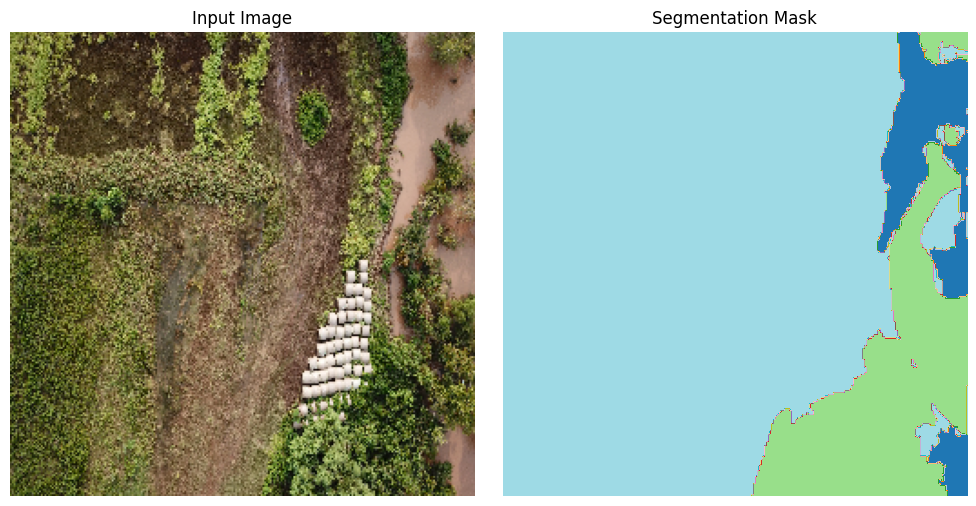

In [42]:
import matplotlib.pyplot as plt

# Get one sample
image, mask = dataset[0]  # or any index like dataset[5], dataset[10], etc.

# Convert image tensor [3, H, W] → [H, W, 3] and convert to numpy
image_np = image.permute(1, 2, 0).cpu().numpy()

# Since we normalized the image with mean=0.5 and std=0.5, reverse it
image_np = (image_np * 0.5) + 0.5  # Unnormalize to [0,1] range

# Plot image and mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask.cpu().numpy(), cmap="tab20")  # You can change colormap
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [43]:
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

model = UNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()


In [44]:
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, masks in train_loader:
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        preds = model(images)
        loss = loss_fn(preds, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {total_loss/len(train_loader):.4f}")


ValueError: Height and Width of image, mask or masks should be equal. You can disable shapes check by setting a parameter is_check_shapes=False of Compose class (do it only if you are sure about your data consistency).

In [45]:
def __getitem__(self, idx):
    img_name = self.images[idx]  # e.g., 10165.jpg
    mask_name = img_name.replace(".jpg", "_lab.png")  # Match your file pattern

    img_path = os.path.join(self.image_dir, img_name)
    mask_path = os.path.join(self.mask_dir, mask_name)

    image = np.array(Image.open(img_path).convert("RGB").resize((256, 256)))
    mask = np.array(Image.open(mask_path).resize((256, 256)))  # Resize mask too

    if self.transform:
        augmented = self.transform(image=image, mask=mask)
        image = augmented["image"]
        mask = augmented["mask"]

    return image, mask


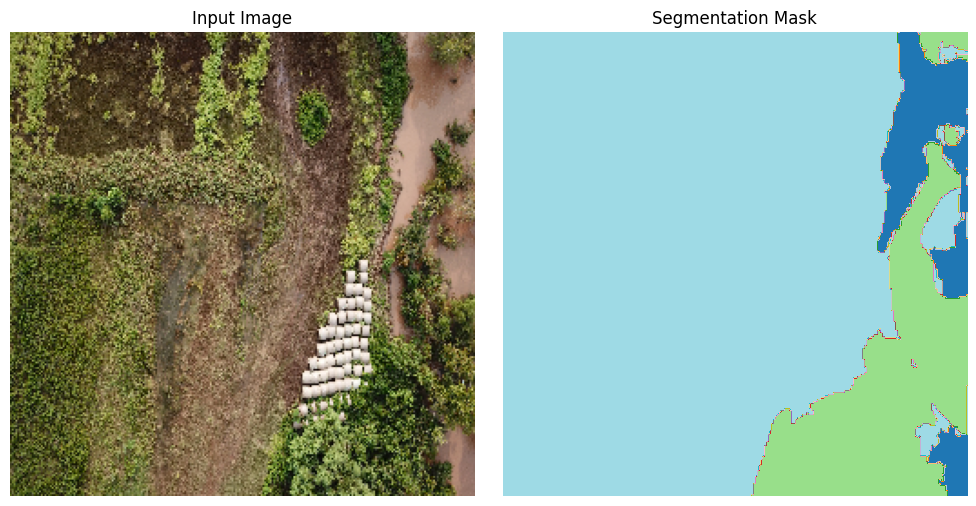

In [46]:
import matplotlib.pyplot as plt

# Get one sample
image, mask = dataset[0]  # or any index like dataset[5], dataset[10], etc.

# Convert image tensor [3, H, W] → [H, W, 3] and convert to numpy
image_np = image.permute(1, 2, 0).cpu().numpy()

# Since we normalized the image with mean=0.5 and std=0.5, reverse it
image_np = (image_np * 0.5) + 0.5  # Unnormalize to [0,1] range

# Plot image and mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask.cpu().numpy(), cmap="tab20")  # You can change colormap
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [47]:
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

model = UNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()


In [48]:
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, masks in train_loader:
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        preds = model(images)
        loss = loss_fn(preds, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {total_loss/len(train_loader):.4f}")


ValueError: Height and Width of image, mask or masks should be equal. You can disable shapes check by setting a parameter is_check_shapes=False of Compose class (do it only if you are sure about your data consistency).

In [49]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])


In [50]:
def __getitem__(self, idx):
    img_name = self.images[idx]
    mask_name = img_name.replace('.jpg', '_lab.png')  # or adapt based on your filenames

    img_path = os.path.join(self.image_dir, img_name)
    mask_path = os.path.join(self.mask_dir, mask_name)

    image = np.array(Image.open(img_path).convert("RGB"))
    mask = np.array(Image.open(mask_path))  # Mask should be grayscale or label map

    if self.transform:
        augmented = self.transform(image=image, mask=mask)
        image = augmented['image']
        mask = augmented['mask']

    return image, mask


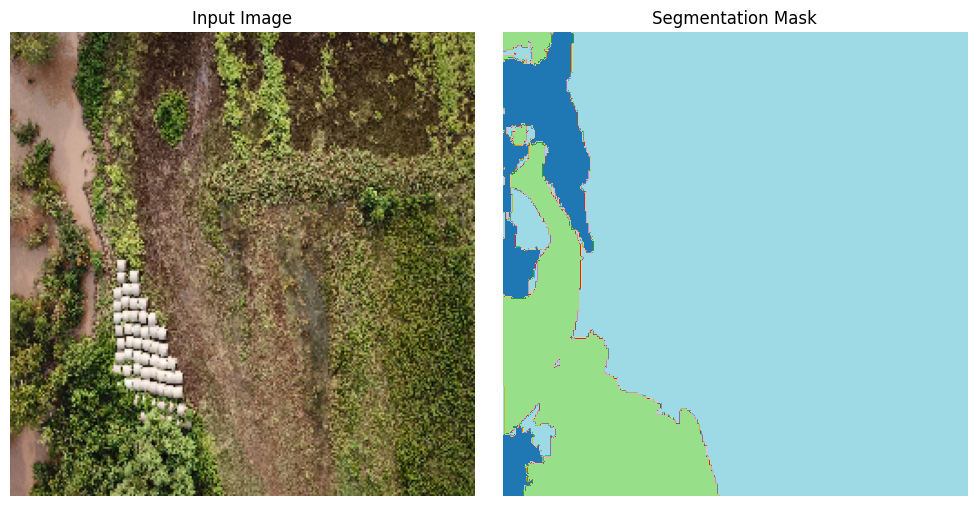

In [51]:
import matplotlib.pyplot as plt

# Get one sample
image, mask = dataset[0]  # or any index like dataset[5], dataset[10], etc.

# Convert image tensor [3, H, W] → [H, W, 3] and convert to numpy
image_np = image.permute(1, 2, 0).cpu().numpy()

# Since we normalized the image with mean=0.5 and std=0.5, reverse it
image_np = (image_np * 0.5) + 0.5  # Unnormalize to [0,1] range

# Plot image and mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask.cpu().numpy(), cmap="tab20")  # You can change colormap
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [53]:
print(UNet.__init__.__code__.co_varnames)
model = UNet(n_classes=7)  # Adjust `n_classes` as per your dataset
model.to(DEVICE)


('self',)


TypeError: UNet.__init__() got an unexpected keyword argument 'n_classes'

In [54]:
print(UNet.__init__.__code__.co_varnames)


('self',)


In [55]:
class UNet(nn.Module):
    def __init__(self, num_classes=7):
        super(UNet, self).__init__()
        # Your encoder and decoder layers...
        
        # Replace the final output layer:
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)


In [56]:
model = UNet(num_classes=7).to(DEVICE)


In [57]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [61]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(256, 256),  # Ensure both image and mask are resized equally
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define UNet (Basic)
class UNet(nn.Module):
    def __init__(self, out_channels):
        super(UNet, self).__init__()
        def CBR(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, 3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )
        self.enc1 = CBR(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = CBR(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = CBR(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = CBR(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        self.bottleneck = CBR(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = CBR(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = CBR(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = CBR(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = CBR(128, 64)

        self.conv_last = nn.Conv2d(64, out_channels, 1)

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        bottleneck = self.bottleneck(self.pool4(enc4))
        dec4 = self.dec4(torch.cat([self.upconv4(bottleneck), enc4], dim=1))
        dec3 = self.dec3(torch.cat([self.upconv3(dec4), enc3], dim=1))
        dec2 = self.dec2(torch.cat([self.upconv2(dec3), enc2], dim=1))
        dec1 = self.dec1(torch.cat([self.upconv1(dec2), enc1], dim=1))
        return self.conv_last(dec1)

# Training setup
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 7  # adjust to your dataset classes
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

model = UNet(out_channels=NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss = 0
    for images, masks in tqdm(train_loader):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE).long()
        
        outputs = model(images)
        loss = criterion(outputs, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {total_loss:.4f}")


  0%|          | 0/13 [00:00<?, ?it/s]


ValueError: Height and Width of image, mask or masks should be equal. You can disable shapes check by setting a parameter is_check_shapes=False of Compose class (do it only if you are sure about your data consistency).

In [63]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
], is_check_shapes=False)  # This disables the shape consistency check


In [65]:
# Dataset paths
image_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image'
mask_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask'

# Dataset class
class FloodNetDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_names = sorted(os.listdir(image_dir))
        self.mask_names = sorted(os.listdir(mask_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

# Create dataset and dataloader
dataset = FloodNetDataset(image_dir, mask_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Simple UNet model
class UNet(nn.Module):
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        def CBR(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True)
            )
        self.enc1 = CBR(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = CBR(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = CBR(128, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = CBR(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = CBR(128, 64)

        self.final = nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))

        d2 = self.dec2(torch.cat([self.up2(e3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return self.final(d1)

# Device, model, loss, optimizer
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(num_classes=7).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, masks in tqdm(train_loader):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE).long()

        outputs = model(images)
        loss = criterion(outputs, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


  0%|          | 0/13 [00:04<?, ?it/s]


IndexError: Target 9 is out of bounds.

In [66]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Dataset paths
image_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image'
mask_dir = '/kaggle/input/aerial-imagery-dataset-floodnet-challenge/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask'

# Automatically detect number of classes in mask
def detect_num_classes(mask_dir):
    max_val = 0
    for fname in os.listdir(mask_dir):
        mask = cv2.imread(os.path.join(mask_dir, fname), cv2.IMREAD_GRAYSCALE)
        max_val = max(max_val, mask.max())
    return int(max_val + 1)

NUM_CLASSES = detect_num_classes(mask_dir)

# Albumentations transform
transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    ToTensorV2()
], is_check_shapes=False)

# Dataset class
class FloodNetDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_names = sorted(os.listdir(image_dir))
        self.mask_names = sorted(os.listdir(mask_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Clamp mask values to valid class range
        mask = np.clip(mask, 0, NUM_CLASSES - 1)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask


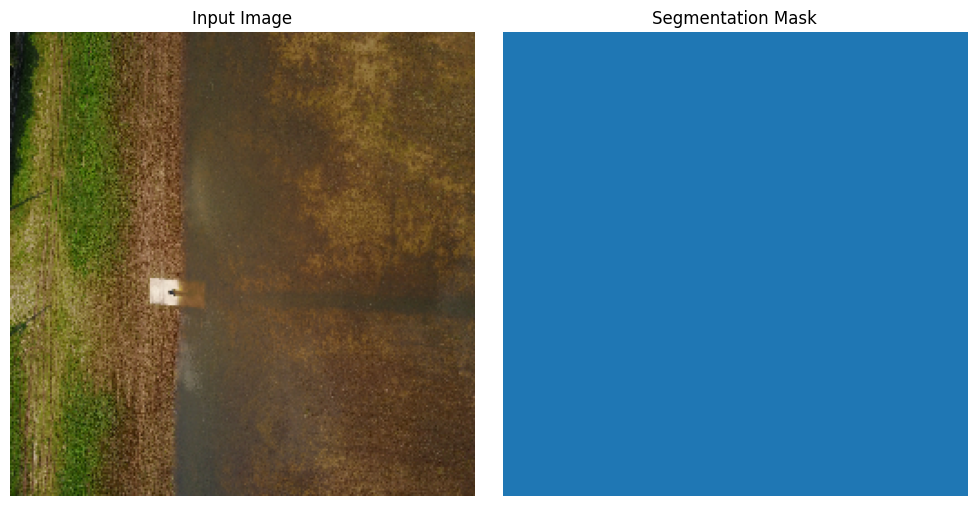

In [67]:
import matplotlib.pyplot as plt

# Get one sample
image, mask = dataset[0]  # or any index like dataset[5], dataset[10], etc.

# Convert image tensor [3, H, W] → [H, W, 3] and convert to numpy
image_np = image.permute(1, 2, 0).cpu().numpy()

# Since we normalized the image with mean=0.5 and std=0.5, reverse it
image_np = (image_np * 0.5) + 0.5  # Unnormalize to [0,1] range

# Plot image and mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask.cpu().numpy(), cmap="tab20")  # You can change colormap
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [68]:
# Create dataset and dataloader
dataset = FloodNetDataset(image_dir, mask_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Simple UNet model
class UNet(nn.Module):
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        def CBR(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True)
            )
        self.enc1 = CBR(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = CBR(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = CBR(128, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = CBR(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = CBR(128, 64)

        self.final = nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))

        d2 = self.dec2(torch.cat([self.up2(e3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return self.final(d1)

# Device, model, loss, optimizer
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(num_classes=NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, masks in tqdm(train_loader):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE).long()

        outputs = model(images)
        loss = criterion(outputs, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

100%|██████████| 13/13 [01:55<00:00,  8.85s/it]


Epoch 1/5, Loss: 2.3160


100%|██████████| 13/13 [01:45<00:00,  8.11s/it]


Epoch 2/5, Loss: 2.2473


100%|██████████| 13/13 [01:44<00:00,  8.04s/it]


Epoch 3/5, Loss: 1.9939


100%|██████████| 13/13 [01:44<00:00,  8.06s/it]


Epoch 4/5, Loss: 1.8602


100%|██████████| 13/13 [01:45<00:00,  8.13s/it]

Epoch 5/5, Loss: 1.8669


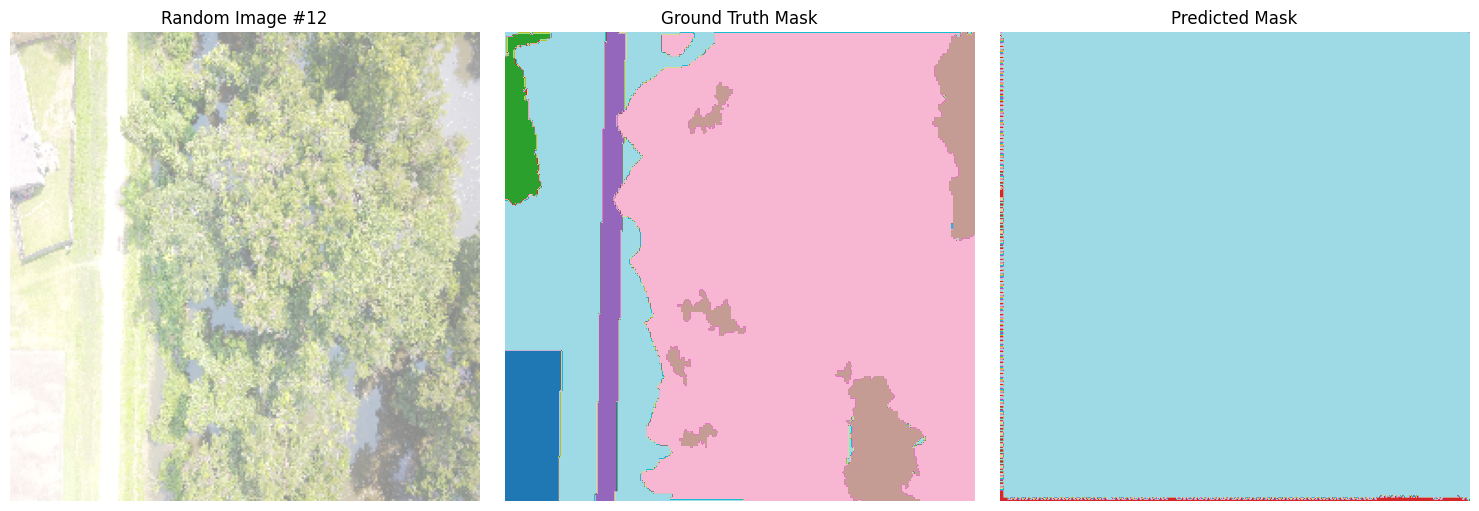

In [69]:
import random
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()
with torch.no_grad():
    # Select a random index
    idx = random.randint(0, len(dataset) - 1)

    # Load sample
    sample_image, sample_mask = dataset[idx]
    input_tensor = sample_image.unsqueeze(0).to(DEVICE)  # [1, 3, H, W]

    # Forward pass
    output = model(input_tensor)
    pred_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

# Unnormalize image for visualization
image_np = sample_image.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title(f"Random Image #{idx}")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sample_mask.cpu().numpy(), cmap="tab20")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap="tab20")
plt.title("Predicted Mask")
plt.axis("off")

plt.tight_layout()
plt.show()
